In [1]:
import argparse
import datetime
import json
import random
import time
from pathlib import Path
import os, sys
import numpy as np
from utils import losses
import torch
from utils.utils import *
from scipy.special import softmax
import matplotlib.pyplot as plt

In [110]:
base_path = "./pro_data/PSPNet_VOC/train/"
files = os.listdir(base_path + "output")
cross_entropy_loss_func = losses.CrossEntropyLoss2d(reduction="none")

In [52]:
true_losses = None
for file in files:
    output = np_read(base_path + f"output/{file}")
    target = np_read(base_path + f"target/{file}")
    losses = cross_entropy_loss_func(torch.from_numpy(output), torch.from_numpy(target))
    losses = losses.numpy()
    np_write(losses, base_path + f"loss/{file}")

In [111]:
true_losses = np_read(base_path + "image_true_losses.npy")

In [76]:
file = files[0]
output = np_read(base_path + f"output/{file}")
target = np_read(base_path + f"target/{file}")
image = np_read(base_path + f"image/{file}")
losses = cross_entropy_loss_func(torch.from_numpy(output), torch.from_numpy(target))

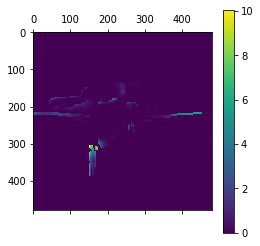

In [65]:
plt.matshow(losses[0])
plt.colorbar()
plt.show()

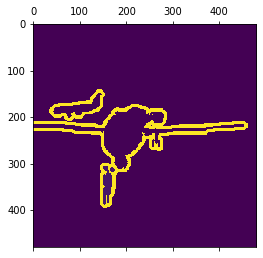

In [62]:
plt.matshow(target[0])
plt.show()

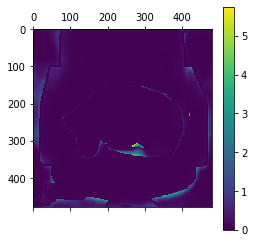

In [77]:
plt.matshow(losses[2])
plt.colorbar()
plt.show()

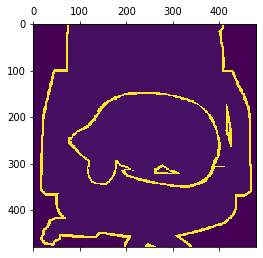

In [78]:
plt.matshow(target[2])
plt.show()

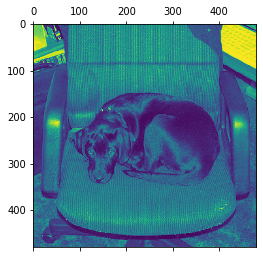

In [79]:
plt.matshow(image[2,1])
plt.show()

In [80]:
output_label = np.argmax(output, axis=1)

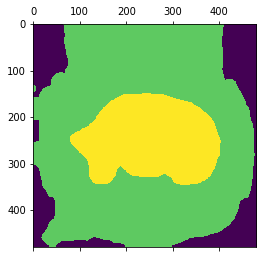

In [83]:
plt.matshow(output_label[2])
plt.show()

## Generate region-baed loss estimation

In [14]:
base_path = "./pro_data/PSPNet_VOC/val/"
files = os.listdir(base_path + "output")

In [15]:
import torch
avgpool = torch.nn.AdaptiveAvgPool2d((30,30))
region_based_losses = None
for file in files:
    losses = np_read(base_path + f"loss/{file}")
    losses = torch.from_numpy(losses)
    losses = avgpool(losses)
    losses = losses.numpy()
    losses = losses.reshape(-1)
    if region_based_losses is None:
        region_based_losses = losses
    else:
        region_based_losses = np.concatenate((region_based_losses, losses), axis=0)

In [16]:
np_write(region_based_losses, base_path + "region_16_16_true_losses.npy")

In [18]:
region_based_losses.size

1304100